# Run the whole deltas algorithm

In [501]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

Heart Disease: 212
Number of attribues: 11
Classes total: 164 - 48

Classes train: 98 - 28
Classes test:  66 - 20


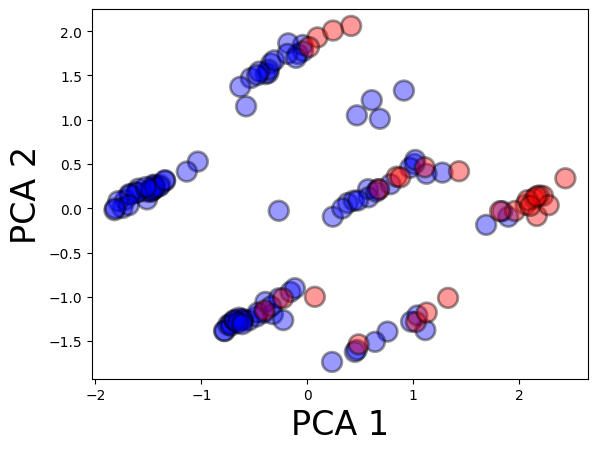

In [502]:
datasets = {0: 'Breast Cancer', 2: 'Iris', 3: 'Wine', 4: 'Pima Indian Diabetes', 
            5: 'Sonar Rocks vs Mines', 6: 'Banknote Authentication',
            7: 'Abalone Gender', 8: 'Ionosphere', 9: 'Wheat Seeds',
            10: 'Credit Scoring 1', 11: 'Credit Scoring 2', 
            12: 'Direct Marketing', 13: 'Habermans breast cancer',
            14: 'Wisconsin Breast Cancer', 15:'Hepatitis',
            16: 'Heart Disease'}
dataset = datasets[2]  # change ind to select dataset to use
model = 'MLP'

dataset = datasets[4]  # change ind to select dataset to use
model = 'SVM-rbf'
# model = 'MLP'
# model = 'MLP-deep'

dataset = datasets[16]  # change ind to select dataset to use
model = 'SVM-rbf'
# model = 'MLP'
# model = 'Linear'

# dataset = datasets[7]  # change ind to select dataset to use
data_clf = data.get_real_dataset(dataset, scale=True)
deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

## Get Classifier

Tuning SVM params with 5 fold CV


Best SVM params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Baseline


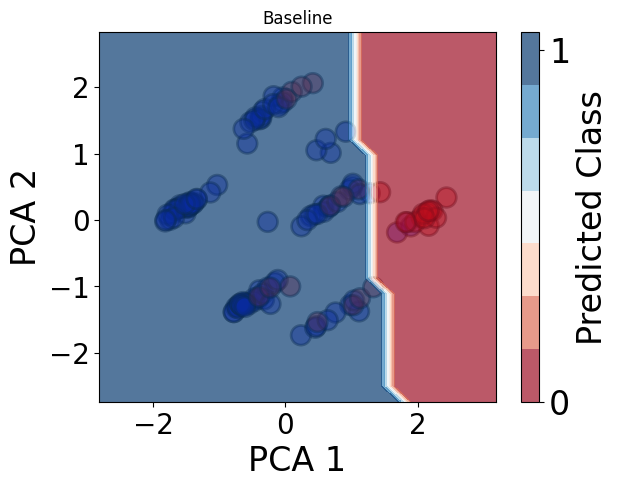

SMOTE


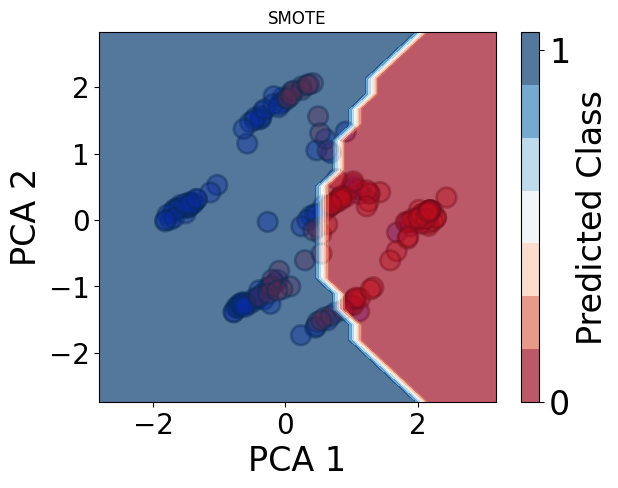

Balanced Weights


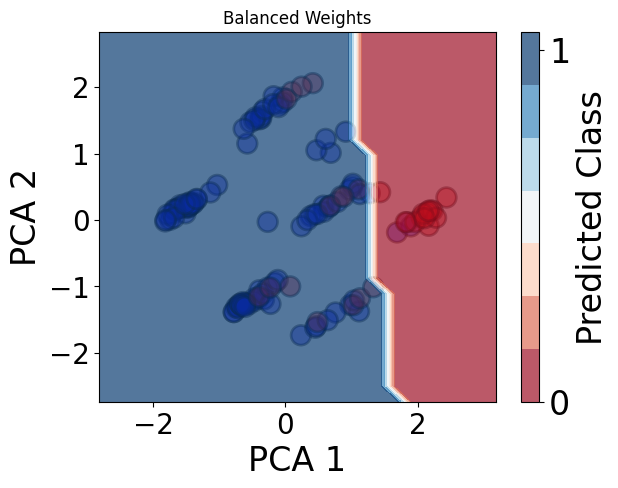

BMR


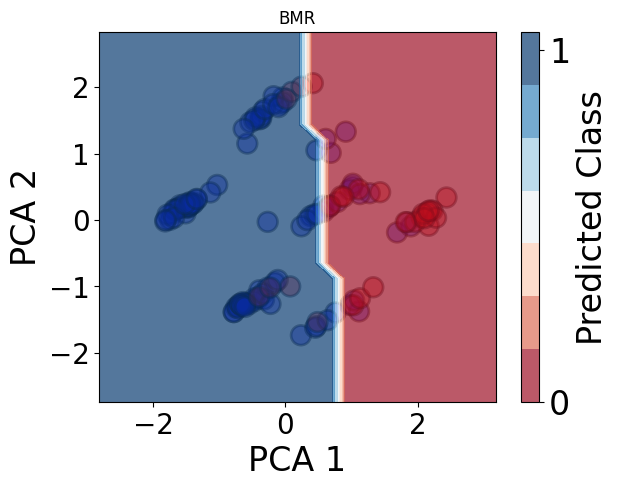

Threshold


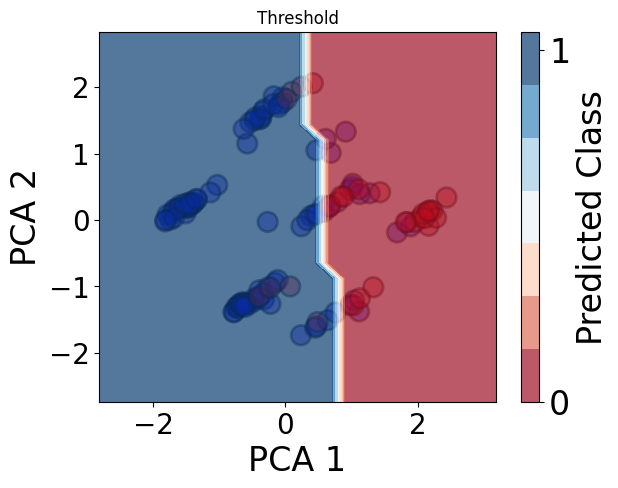

In [503]:
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model)

data_clf['clf'] = classifiers_dict['Baseline']

## Fit deltas

Original Data


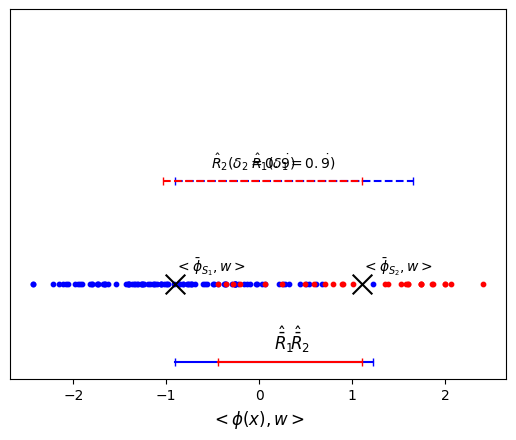

Budget 63 found 19 viable downsampled solutions
Best solution found by removing 43 data points
Downsampled Data:


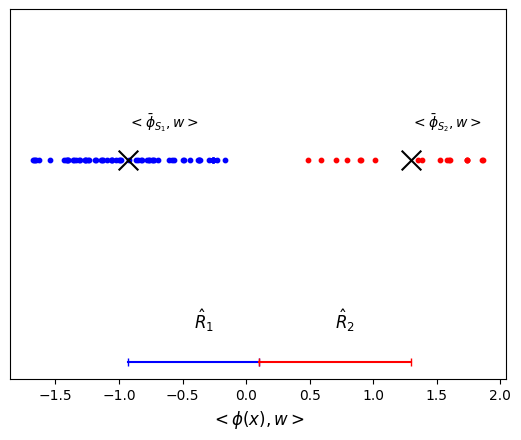

In [504]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=10,
                                                     _print=True, 
                                                     _plot=True,
                                                     method='supports-prop-update_mean',
                                                     max_trials=10000,
                                                     parallel=True)

## Plot training data information

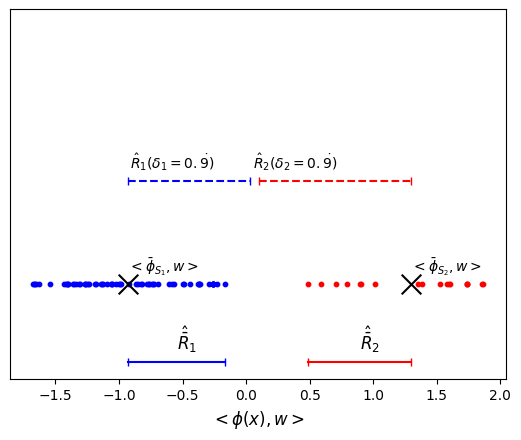

In [505]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

## Show parameters

In [506]:
deltas_model.print_params()

Parameters
                R:  1.8673469443558783
                N1: 65
                N2: 18
                R1: 0.7641950681175356
                R2: 0.8114655775506658
                M:  0.6499088215857969
                D:  2.2255694672539983
                C1: 1
                C2: 1


# Evaluation on test data

                  Accuracy    G-Mean   ROC-AUC        F1
Method                                                  
Baseline          0.895349  0.793916  0.809848  0.742857
SMOTE             0.837209  0.762273  0.771970  0.650000
Balanced Weights  0.895349  0.793916  0.809848  0.742857
BMR               0.906977  0.886344  0.887121  0.809524
Threshold         0.906977  0.886344  0.887121  0.809524
Our Method        0.930233  0.900757  0.902273  0.850000 


Baseline


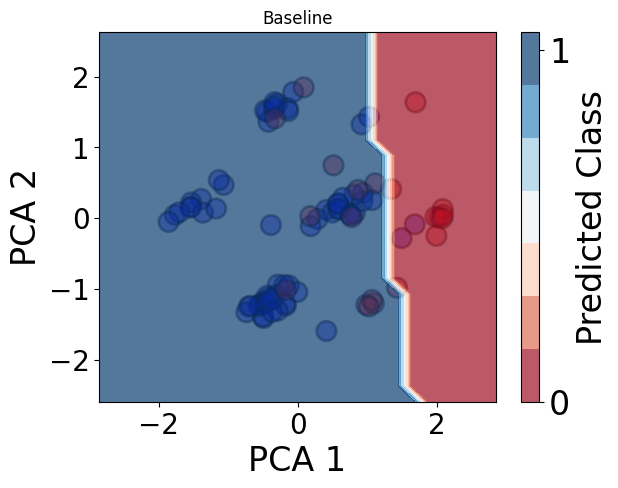

SMOTE


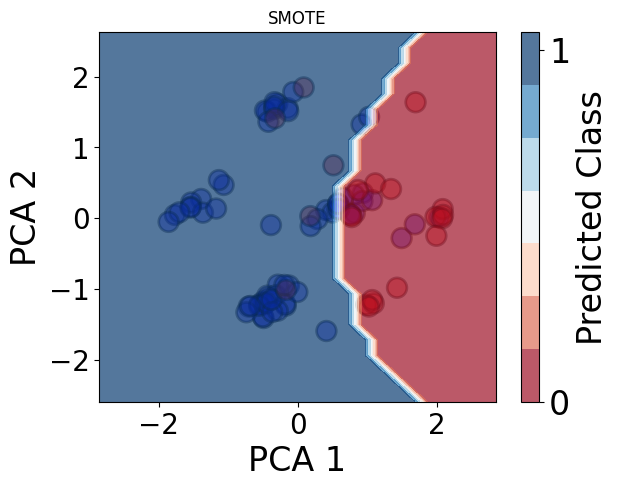

Balanced Weights


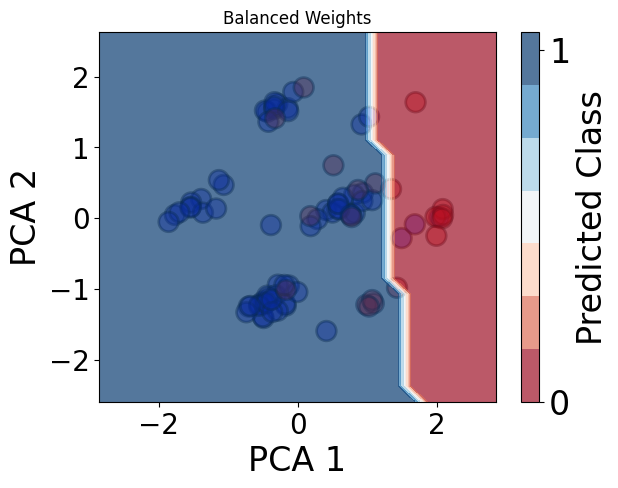

BMR


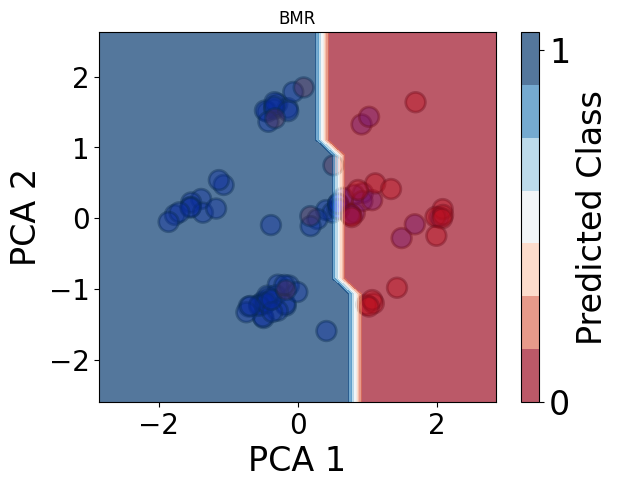

Threshold


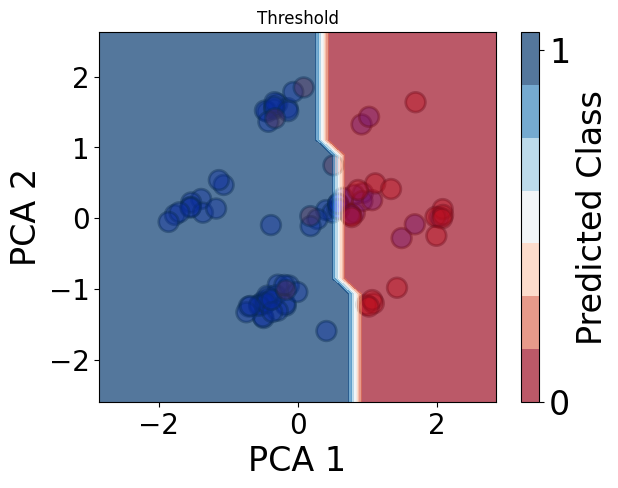

Our Method


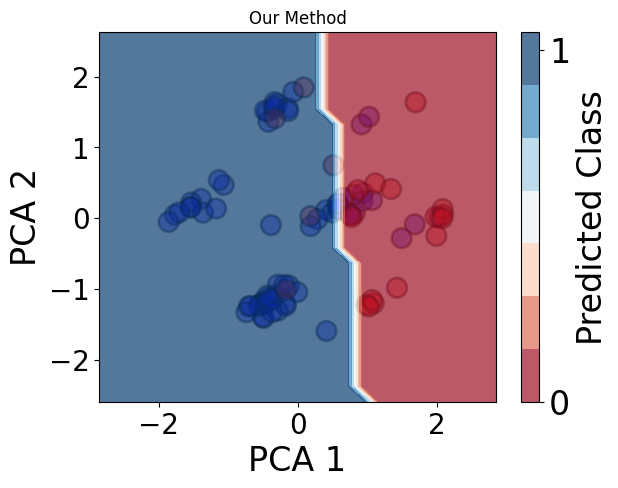

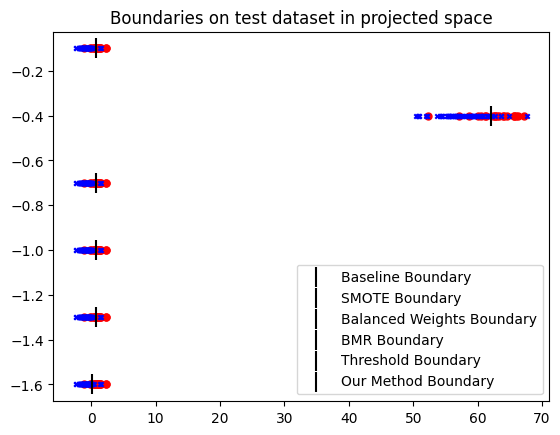

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Baseline & 0.8953 & 0.7939 & 0.8098 & 0.7429 \\
SMOTE & 0.8372 & 0.7623 & 0.7720 & 0.6500 \\
Balanced Weights & 0.8953 & 0.7939 & 0.8098 & 0.7429 \\
BMR & 0.9070 & 0.8863 & 0.8871 & 0.8095 \\
Threshold & 0.9070 & 0.8863 & 0.8871 & 0.8095 \\
Our Method & 0.9302 & 0.9008 & 0.9023 & 0.8500 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Baseline,0.895349,0.793916,0.809848,0.742857
SMOTE,0.837209,0.762273,0.771970,0.650000
Balanced Weights,0.895349,0.793916,0.809848,0.742857
BMR,0.906977,0.886344,0.887121,0.809524
Threshold,0.906977,0.886344,0.887121,0.809524
Our Method,0.930233,0.900757,0.902273,0.850000


In [507]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])